# CNN for Image Classfication on the Fashion MNIST Dataset

In addition to using the convolutional neural network architecture for image classification, I also want to explore whether using dropout layers helps or hinders the model training process. LazyProgrammer in the PACKT course elucidates it best: machine learning is experimentation, not philosophy.

Without further ado, let's get started!

## Step 1: Load the Data

As always, we begin by loading the data and investigating its structure and shape. Lucky for us, the Fashion MNIST dataset comes with Tensorflow.

(60000, 28, 28)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


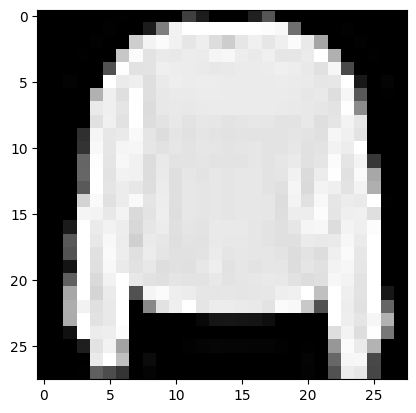

In [1]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(np.unique(y_train, return_counts=True))

plt.imshow(X_train[7], cmap='gray')


The dataset looks just like the standard MNIST dataset of handwritten digits. The data is also evenly spread out, so we wouldn't have to stratify it for training. 

Next, we must prepare the data for our CNN model. The model expects 3D data: height, width, color. Let's preprocess our data.

In [2]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

(60000, 28, 28, 1)


In [3]:
# number of classes to classify
K = len(set(y_train))

print("Number of classes:", K)

Number of classes: 10


## Step 2: Build the Model

We'll build a function for instantiating the model since we wish to test the case without dropout layers as well as those with dropout layers. 

In [4]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

def CNN_Model(dropout=False):
    i = Input(shape=X_train[0].shape)
    x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
    x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
    x = Flatten()(x)

    if dropout==True:
        x = Dropout(0.2)(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.2)(x)
    else:
        x = Dense(512, activation='relu')(x)

    x = Dense(K, activation='softmax')(x)

    return Model(i, x)

model = CNN_Model()
model_dropout = CNN_Model(True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train Model

Next, we train and plot the losses and accuracies of our two models.


In [5]:
from sklearn.model_selection import train_test_split

# Prepare validation data - we must not use the test set here!
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train,
                                                      test_size=0.2,
                                                      random_state=7)

In [6]:
r = model.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid), 
              epochs=15)

r_d = model_dropout.fit(X_train, y_train, 
                        validation_data=(X_valid, y_valid), 
                        epochs=15)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8087 - loss: 0.5192 - val_accuracy: 0.8543 - val_loss: 0.3876
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8695 - loss: 0.3478 - val_accuracy: 0.8782 - val_loss: 0.3299
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8887 - loss: 0.2916 - val_accuracy: 0.8879 - val_loss: 0.3013
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9048 - loss: 0.2540 - val_accuracy: 0.8947 - val_loss: 0.2897
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9160 - loss: 0.2209 - val_accuracy: 0.8958 - val_loss: 0.2890
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9286 - loss: 0.1911 - val_accuracy: 0.8955 - val_loss: 0.3056
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9379 - loss: 0.1642 - val_accuracy: 0.8961 - val_loss: 0.3028
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9457 - loss: 0.1434 - 

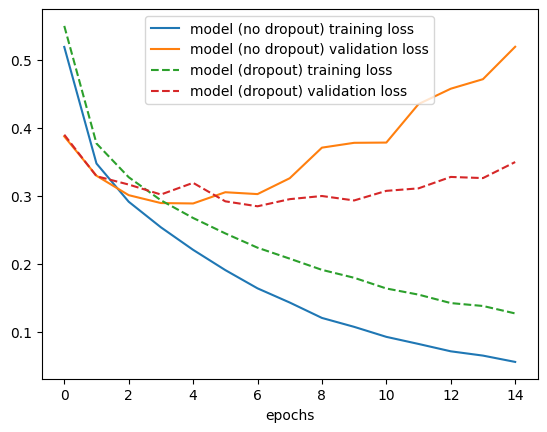

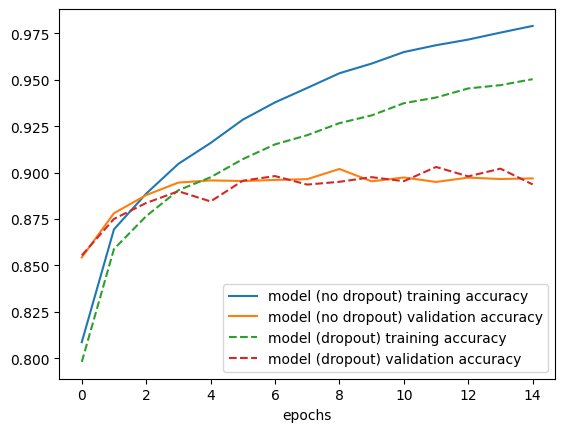

In [7]:
plt.plot(r.history['loss'], label='model (no dropout) training loss')
plt.plot(r.history['val_loss'], label='model (no dropout) validation loss')
plt.plot(r_d.history['loss'], linestyle='--', label='model (dropout) training loss')
plt.plot(r_d.history['val_loss'], linestyle='--', label='model (dropout) validation loss')
plt.xlabel("epochs")
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='model (no dropout) training accuracy')
plt.plot(r.history['val_accuracy'], label='model (no dropout) validation accuracy')
plt.plot(r_d.history['accuracy'], linestyle='--', label='model (dropout) training accuracy')
plt.plot(r_d.history['val_accuracy'], linestyle='--', label='model (dropout) validation accuracy')
plt.xlabel("epochs")
plt.legend()
plt.show()

From the training and validation loss/accuracy plots, it’s clear that the model with dropout outperforms the model without dropout in terms of generalization. The non-dropout model displays a widening gap between training and validation metrics as epochs increase, characteristic of overfitting. In contrast, the dropout model achieves similar training and validation performance, with consistently lower validation loss and stable accuracy. 

This suggests that incorporating dropout regularizes the model better, possibly resulting in better performance on unseen data.

We'll proceed with the dropout model. 

## Test and Evaluate the Model

Next, we test our dropout model on unseen data and evaluate its predictions. We visualize our result using a confusion matrix.

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(model.evaluate(X_test, y_test))
print("Classification report:")
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8887 - loss: 0.5818  
[0.5818247199058533, 0.888700008392334]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.88      0.89      0.89      1000
           4       0.79      0.85      0.82      1000
           5       0.95      0.98      0.97      1000
           6       0.69      0.70      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [9]:
# Class names
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

Text(50.722222222222214, 0.5, 'True Label')

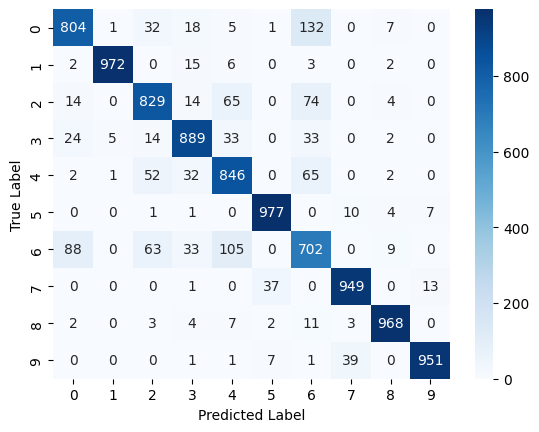

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, 
            annot=True,
            fmt='d',
            cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

The model confuses T-shirts with shirts the most. Other misclassifications include misclassifying shirts as coats and pullovers. Let's see some of these misclassified items. 

Text(0.5, 1.0, 'True Label: T-shirt/top, Predicted Label: Shirt')

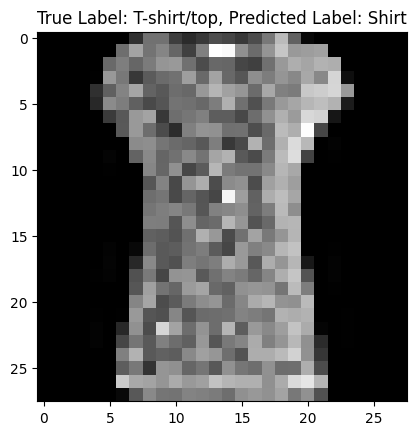

In [29]:
misclassified_idx = np.where(y_pred_labels != y_test)[0]
i = np.random.choice(misclassified_idx)

plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {class_names[y_test[i]]}, Predicted Label: {class_names[y_pred_labels[i]]}")

I'm not sure my brain would attain 100% accuracy on the Fashion MNIST dataset!

## Conclusion

Overall, these results highlight the effectiveness of using dropout to improve model generalization on the Fashion MNIST dataset. While both models achieve strong training performance, only the dropout model maintains high validation accuracy and avoids overfitting.